## Continue the Learning!

Now that you have one classification technique down, let's try another, **Decision Trees**. We will also be discuss a way to analyze accuracy called a **Confusion Matrix**. 


## Decision Trees: Importing and Cleaning up the Data
We already loaded the data in the beginning. Let's load it again, just in case you are starting to run the code from here.

In [1]:
import pandas as pd #loading data in table form  
import numpy as np # linear algebra
from sklearn.tree import DecisionTreeClassifier # Creating the Decision Tree
from sklearn import tree # Visualizing the Decision Tree
import graphviz # Visualizing the Decision Tree
from sklearn.metrics import confusion_matrix # Confusion Matrix
import matplotlib.pyplot as plt # visualization
from sklearn.datasets import load_iris

# Load the dataset, which contains the examples and their labels
iris_dataset = load_iris()

## Decision Tree: Splitting up the training and test sets

Remember that in classification, which is a type of supervised machine learning, we must use a training set to teach our model how to correctly classify future examples. We also use a test set to test how good our model is.

The first step that we'll do is break up the Iris dataset into training set and test set:

In [2]:
from sklearn.model_selection import train_test_split

# Break the dataset up into the examples (X) and their labels (y)
X, y = iris_dataset.data, iris_dataset.target

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

Our training set contains all of the correct targets (classes) for our flower examples, along with the four features of each flower. We'll need all of this information to teach our classifier how to predict a class given a new set of four features.

**Note: Because the data points are split randomly into train and test, each run might not be the same**

## Decision Tree: Training our Classifier

As Decision Trees are a well-known classifier. There is already a library with a function to make one. You can always create it from scratch, but sometimes using the library function is less tedius. When you need to customize more advanced aspects of the classifier, it makes sense to start from scratch, unlike here.

In [3]:
# sklearn classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a max_depth of 5
classifier = DecisionTreeClassifier(max_depth=5)

# Fit the classifier to the training set
classifier = classifier.fit(X_train, y_train)

## Decision Tree: Visualizing the Classifier

We can use some of the libraries to visualize our Descicion right here, instead of using a separate software. One of the major advantages with using a Decision Tree is that we can see visually how it makes its decisions. This **transparency** is not true for ANNs and is a very important research question currently.

For example, machine learning is often used in government agencies today. If a model makes a decision that can affect whether someone gets health care, they should be able to justify *why* the system made the decision that it did.

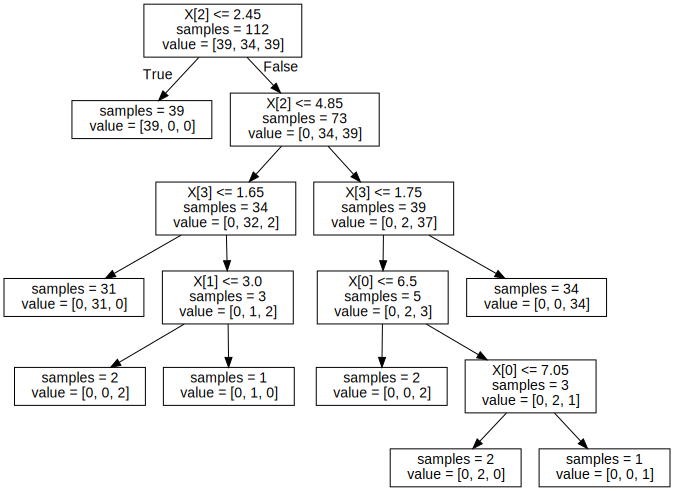

In [4]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data)

# Displays Graph
graph

_Again, because we split the dataset randomly, this means that your decision tree may look different from another student's decision tree._

It takes some practice to read the visualization of the decision tree, but it's actually quite informative. The root node of the decision tree starts with the line `X[3] <= 0.75`. This is the condition that splits the tree. In this case, it's saying that we should look at the feature with index 3 (petal width) and see if it's less than or equal to 0.75. If this is true, we will follow the tree to the left child. If this is false, we will follow the tree to the right child.

The `samples = 112` line means that at this node, we still have 112 samples to look at.

The `[39, 34, 39]` line tells us that of these 112 samples, 39 are the zeroth class (setosa), 34 are the first class (versicolor), and 39 are the second class (virginica).

After the first split, we'll see that we did really well! All 39 samples of setosa are correctly classified in the left child of the root.

We can follow the visualization for the rest of the decision tree to see what feature it splits on at each node.

---
## Decision Tree: Testing
We've trained our decision tree and visualized it, but we have not yet tested it to see how well it does. This is where the test set comes in -- the test set is a set of correctly labelled examples that we have withheld from the decision tree, so we can test to see if the predictions made by the decision tree match the correct labels.

With `sklearn`, it's really easy to generate our predicted labels for the test set:



In [5]:
# Create a list of predicted classes for each of the examples in the test set
y_predict = classifier.predict(X_test)
y_predict

array([1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2])

In order to find the accuracy of our classifier on the test set, we use the function `score()`, which takes two parameters: (1) the data of the test set, and (2) the correct labels of the test set.

It will automatically compare our predicted label with the correct label to compute the accuracy.

In [6]:
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.9473684210526315


## Congrats!

Now you've made a decision tree as well! But we are mssing something... Sure, we know the accuracy of the classifier, but what about the distributions of answers? False Positives? False Negatives? That kind of information is valuable for analyzing error and we can see it through a **confusion matrix**

---
 ## Confusion Matrix

Trust me, it's not as confusing as it sounds. Here we will display a confusion matrix to analyze our predictions.

We'll use the familiar `matplotlib` library to accomplish this visualization, but we'll also use a library called `seaborn` to make our visualization look a bit nicer:

<AxesSubplot: >

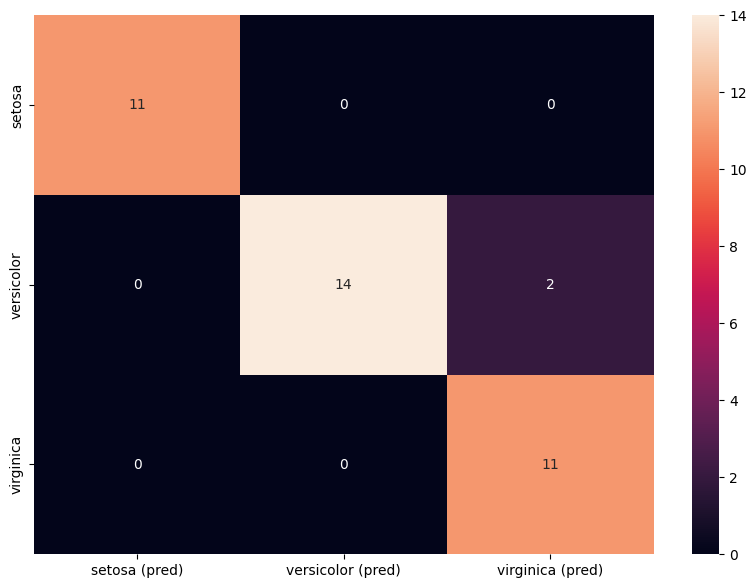

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(
    confusion_matrix, 
    index = [idx for idx in ['setosa', 'versicolor', 'virginica']],
    columns = [col for col in ['setosa (pred)', 'versicolor (pred)', 'virginica (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)

Our confusion matrix in this case is a 3x3 table, because there are 3 different possible classes for each flower. The columns tell us what class we predicted, whereas the rows tell us what the actual class is.

*Because we randomly split the data set, your confusion matrix might look different from another run.*

The first row tells us that for flowers that should actually be classified as setosa, what our decision tree predicted their class should be. In the example screenshot, there were 11 setosa flowers, and they were all correctly labelled setosa.

The second row is more interesting. It tells us that there were 16 versicolor plants, but only 14 were classified correctly. The remaining two were predicted to be virginica, which was incorrect.

Finally, the last row shows that our decision tree classified all 11 virginica plants correctly.

For this particular example above, there were 38 test examples, and 36 were classified correctly, for an accuracy of 94.7%. The confusion matrix helps us visualize the performance of our decision tree and in addition to the accuracy number itself, it gives us the added information of which type of flower we tended to classify incorrectly.

---
#That's all Folks!

Thank you so much for going through this tutorial. I am confident you will now be able to use AI to change the world and save our planet!

If you have any more questions email me at : isitatalukdar@gmail.com

